# Detectando o Invisível: Como a Análise de Dados Pode Prevenir Fraudes em Transações Bancárias
## Notebook 01 — Análise Exploratória de Dados (EDA)

---

**Objetivo:** Explorar e compreender os dados de transações financeiras, identificando padrões de comportamento, anomalias e variáveis potencialmente associadas a fraudes.

**Entradas:** Dataset limpo (`fraud_clean.csv`).\
**Saídas:** Tabela consolidada de risco relativo das primeiras features (`consolidated_risk_table_first_features.csv`), estatísticas descritivas, gráficos exploratórios e insights iniciais sobre o comportamento das fraudes.

---

### Estrutura deste notebook
3. Exploratory Data Analysis - Features Iniciais\
   3.1. Categorização das Features\
   3.2. Análise Univariada - Variáveis Numéricas\
   3.3. Análise Univariada - Variáveis categóricas\
   3.4. Análise Bivariada - Relação com Fraude\
   3.5. Consolidação de Descobertas\
   3.6. Conclusões da Análise Exploratória


### Importing the libraries

Carregando: ['pd', 'sns', 'plt', 'mpl', 'np']
------------------------------
✅ pd (pandas)
✅ sns (seaborn)
✅ plt (matplotlib.pyplot)
✅ mpl (matplotlib)
✅ np (numpy)

VERSÕES:
Python: 3.10.2
pandas: 2.2.2
seaborn: 0.13.2
matplotlib: 3.8.4
matplotlib: 3.8.4
numpy: 1.26.4

Bibliotecas disponíveis diretamente (IPython): ['pd', 'sns', 'plt', 'mpl', 'np']


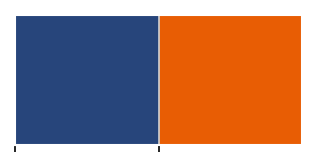

In [36]:
# Data manipulation and visualization.
import sys
sys.path.append('../src')

from utils import profiling as prof
from utils.lib_loader import carregar_libs
carregar_libs(['pd','sns','plt','mpl','np'])

from visualization import eda_graphs as edag
from utils.eda_aux import *

pd.set_option('display.max_columns', None)

### Visualization Settings
%matplotlib inline

plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['figure.max_open_warning'] = 50

mpl.style.use('ggplot') 
mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['axes.linewidth']      = 1
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['figure.dpi']          = 150
mpl.rcParams['axes.grid']           = True
mpl.rcParams['font.size']           = 12

# Palette Setting and Display
color_palette = ['#27457B', '#e85d04']
sns.set_palette(sns.color_palette(color_palette))
sns.color_palette(color_palette)
sns.palplot(color_palette)

## Importação e Visão Geral

In [37]:
df = pd.read_csv('../data/interim/fraud_clean.csv')
df.head()

,transaction_id,merchant_id,user_id,hash_card_number,transaction_date,transaction_amount,device_id,has_cbk,has_device_info,transaction_day,transaction_time,transaction_hour,part_of_day,day_of_week,is_weekend,first_transaction,time_diff_min,time_diff_less_1h
0,21320398,29744,97051,cn_225730bfed215e86fcb14e416783716d42c37eb87b0...,2019-12-01 23:16:32.812632,374.56,285475.0,0,1,2019-12-01,23:16:32.812632,23,Evening,Domingo,1,1,0.000000,1th transaction
1,21320399,92895,2708,cn_1026e63cb76b5fdaeab4f472b47236d4539cf48d2ec...,2019-12-01 22:45:37.873639,734.87,497105.0,1,1,2019-12-01,22:45:37.873639,22,Evening,Domingo,1,0,2624.721795,> 1h
2,21320400,47759,14777,cn_a44e42e0d67ad8cdac30990f2f1f8718c74a03c4d40...,2019-12-01 22:22:43.021495,760.36,unknown_device,0,0,2019-12-01,22:22:43.021495,22,Evening,Domingo,1,1,0.000000,1th transaction
3,21320401,68657,69758,cn_fa68ce07344577d64f20949a4aea6159020655897c7...,2019-12-01 21:59:19.797129,2556.13,unknown_device,1,0,2019-12-01,21:59:19.797129,21,Evening,Domingo,1,0,161.967766,> 1h
4,21320402,54075,64367,cn_3c6a38fd69a2ab71859017440efa3d722a97c209cf7...,2019-12-01 21:30:53.347051,55.36,860232.0,0,1,2019-12-01,21:30:53.347051,21,Evening,Domingo,1,1,0.000000,1th transaction


In [3]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 3199 rows and 18 columns.


### Data dictionary

| Variáveis Originais  |
|:---------------------|

| Variável           | Descrição                                         | Tipo                 |
|:-------------------|:--------------------------------------------------|:---------------------|
| transaction_id     | Identificador único da transação                  | String/ID            |
| merchant_id        | Identificador do estabelecimento comercial        | String/ID            |
| user_id            | Identificador do usuário que realizou a transação | String/ID            |
| hash_card_number   | Número do cartão usado (hash/anonimizado)         | String/ID            |
| transaction_date   | Data e hora da transação                          | DateTime             |
| transaction_amount | Valor monetário da transação (R$)                 | Numerical continuous |
| device_id          | Identificador do dispositivo usado na transação   | String/ID            |
| has_cbk            | Target: 1 = Fraude (chargeback), 0 = Legítimo     | Binary (0/1)         |

---

| Novas Variáveis    |
|:-------------------|

| Variável            | Descrição                                                                                    | Tipo                   |
|:--------------------|:---------------------------------------------------------------------------------------------|:-----------------------|
| has_device_info     | Indica se há informação de dispositivo disponível                                            | Binary (0/1)           |
| transaction_day     | Dia do mês em que a transação ocorreu                                                        | Numerical discrete     |
| transaction_time    | Horário completo da transação                                                                | Time                   |
| transaction_hour    | Hora do dia da transação (0–23)                                                              | Numerical discrete     |
| part_of_day         | Período do dia (madrugada, manhã, tarde, noite)                                              | Categorical            |
| day_of_week         | Dia da semana da transação                                                                   | Categorical            |
| is_weekend          | Indica se a transação ocorreu no fim de semana                                               | Binary (0/1)           |
| first_transaction   | Indica se é a primeira transação do usuário                                                  | Binary (0/1)           |
| time_diff_min       | Diferença de tempo (em minutos) para a transação anterior do usuário                         | Numerical continuous   |
| time_diff_less_1h   | Indica se a transação ocorreu em menos de 1h após a anterior                                 | Categorical            |
| anomalous_value     | Indica se o valor da transação é anômalo em relação ao histórico do usuário                  | Binary (0/1)           |
| value_exc_max       | Indica se o valor da transação excede o máximo histórico do usuário                          | Binary (0/1)           |
| burst_transaction   | Indica padrão de múltiplas transações em curto intervalo de tempo                            | Binary (0/1)           |
| multi_card_flag     | Indica uso de múltiplos cartões pelo mesmo usuário                                           | Binary (0/1)           |
| multi_device_flag   | Indica uso de múltiplos dispositivos pelo mesmo usuário                                      | Binary (0/1)           |
| user_fraud_above_50 | Indica se o usuário possui taxa histórica de fraude > 50%                                    | Binary (0/1)           |
| comb_a              | Combinação de 'alor alto' + 'horário noturno', capturando risco composto                     | Binary (0/1)           |
| nighttime_flag      | Indica se a transação ocorreu entre 19h e 3h                                                 | Binary (0/1)           |

# 3. Exploratory Data Analysis - Features Iniciais

Nesta seção, iremos explorar o conjunto de dados com o objetivo de compreender o comportamento das variáveis de forma individual e conjunta, identificando padrões, correlações, tendências e possíveis sinais associados a transações fraudulentas.

Para este estudo, adotamos a variável `has_cbk` como target, onde 1 representa fraude (chargeback) e 0 representa transações legítimas.

A análise será conduzida por meio de abordagens univariadas e bivariadas, permitindo avaliar tanto a distribuição das variáveis quanto sua relação com o evento de fraude, servindo como base para a etapa de engenharia de features e construção do score de risco.

## 3.1. Categorização das Features

Antes de iniciar a análise exploratória propriamente dita, é fundamental compreender a natureza das variáveis disponíveis no dataset. Essa etapa permite definir quais técnicas estatísticas e visuais são mais adequadas para cada tipo de dado, além de evitar interpretações incorretas ao longo do EDA.

Nesta fase, realizamos uma inspeção estrutural das features, classificando-as de acordo com sua natureza e papel analítico, considerando tanto o tipo de dado quanto seu comportamento prático no contexto do problema de fraude.

As variáveis serão organizadas nas seguintes categorias:

- **Variáveis numéricas contínuas**:\
  Valores monetários ou métricas quantitativas com distribuição contínua.

- **Variáveis numéricas tratadas como categóricas (discretas)**:\
  Variáveis numéricas que representam estados, contagens ou flags, analisadas como categorias.

- **Variáveis categóricas**:\
  Identificadores ou rótulos que representam entidades ou grupos distintos.

- **Variáveis temporais (DateTime)**:\
  Informações de data e hora.

- **Variáveis derivadas de tempo (Timedelta)**:\
  Métricas calculadas a partir de diferenças temporais entre eventos.

- **Variáveis que não se enquadram nas categorias anteriores**:\
  Features auxiliares ou intermediárias, avaliadas caso a caso.

- **Variáveis removidas**:\
  Colunas excluídas por redundância, baixa relevância ou risco de vazamento de informação.

- **Variável alvo (Target)**:\
  Indicador de fraude (`has_cbk`), que orienta toda a análise subsequente.

Essa categorização estabelece a base para as análises univariadas e bivariadas das próximas seções, garantindo coerência metodológica e clareza na interpretação dos padrões observados.

In [4]:
df.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
transaction_id,3199.0,21321997.0,923.6,21320398.0,21321197.5,21321997.0,21322796.5,21323596.0
merchant_id,3199.0,48771.1,29100.4,16.0,23426.0,48752.0,73915.0,99799.0
user_id,3199.0,50891.1,29515.3,6.0,24267.5,52307.0,76837.0,99974.0
transaction_amount,3199.0,767.8,889.1,1.2,205.2,415.9,981.7,4097.2
has_cbk,3199.0,0.1,0.3,0.0,0.0,0.0,0.0,1.0
has_device_info,3199.0,0.7,0.4,0.0,0.0,1.0,1.0,1.0
transaction_hour,3199.0,15.5,6.0,0.0,14.0,17.0,20.0,23.0
is_weekend,3199.0,0.4,0.5,0.0,0.0,0.0,1.0,1.0
first_transaction,3199.0,0.8,0.4,0.0,1.0,1.0,1.0,1.0
time_diff_min,3199.0,326.1,2083.2,0.0,0.0,0.0,0.0,36983.0


In [5]:
report_01 = prof.profile_df(df)
report_01.round(1)

,col,dtype,n_rows,n_null,pct_null,n_unique,cardinality_ratio,dup_rate_col,sample_values,has_mixed_types,min,max
0,transaction_id,int64,3199,0,0.0,3199,1.0,0.0,"[21320398, 21320399, 21320400, 21320401, 21320...",False,21320398.0,21323596.0
1,merchant_id,int64,3199,0,0.0,1756,0.5,0.5,"[29744, 92895, 47759, 68657, 54075]",False,16.0,99799.0
2,user_id,int64,3199,0,0.0,2704,0.8,0.2,"[97051, 2708, 14777, 69758, 64367]",False,6.0,99974.0
3,hash_card_number,object,3199,0,0.0,2925,0.9,0.1,[cn_225730bfed215e86fcb14e416783716d42c37eb87b...,False,NaN,NaN
4,transaction_date,object,3199,0,0.0,3199,1.0,0.0,"[2019-12-01 23:16:32.812632, 2019-12-01 22:45:...",False,NaN,NaN
5,transaction_amount,float64,3199,0,0.0,3124,1.0,0.0,"[374.56, 734.87, 760.36, 2556.13, 55.36]",False,1.2,4097.2
6,device_id,object,3199,0,0.0,1997,0.6,0.4,"[285475.0, 497105.0, unknown_device, unknown_d...",False,NaN,NaN
7,has_cbk,int64,3199,0,0.0,2,0.0,1.0,"[0, 1, 0, 1, 0]",False,0.0,1.0
8,has_device_info,int64,3199,0,0.0,2,0.0,1.0,"[1, 1, 0, 0, 1]",False,0.0,1.0
9,transaction_day,object,3199,0,0.0,31,0.0,1.0,"[2019-12-01, 2019-12-01, 2019-12-01, 2019-12-0...",False,NaN,NaN


Anotações
1. `has_cbk`: Variável Target.
2. `transaction_date`, `transaction_day`, `transaction_time`, `time_diff_min`, `hash_card_number`, `device_id`, `transaction_id`, `merchant_id`, `user_id`: Remover variáveis das análises gráficas iniciais.

In [6]:
feat_summary = analyze_features(data= df, target= 'has_cbk', remove_features=['transaction_date', 'transaction_day', 'time_diff_min', 'transaction_time', 
                                                                              'hash_card_number', 'device_id', 'transaction_id', 'merchant_id', 'user_id'], discrete_cardinality=10)

numeric_features = feat_summary['numeric_features'];
categorical_features = feat_summary['categorical_features'];
discrete_numeric_as_categorical = feat_summary['discrete_numeric_as_categorical'];
target = feat_summary['target'];

There are 18 features.

2 numeric feature(s).
['transaction_amount', 'transaction_hour'] 

3 numeric feature(s) considered categorical (discrete).
['has_device_info', 'is_weekend', 'first_transaction'] 

3 categorical feature(s).
['part_of_day', 'day_of_week', 'time_diff_less_1h'] 

0 datetime feature(s).
[] 

0 timedelta feature(s).
[] 

0 feature(s) that don't fit the above.
[] 

9 removed feature(s).
['transaction_date', 'transaction_day', 'time_diff_min', 'transaction_time', 'hash_card_number', 'device_id', 'transaction_id', 'merchant_id', 'user_id'] 

Target feature:
has_cbk


## 3.2. Análise Univariada - Variáveis Numéricas

### 3.2.1. Distribuições

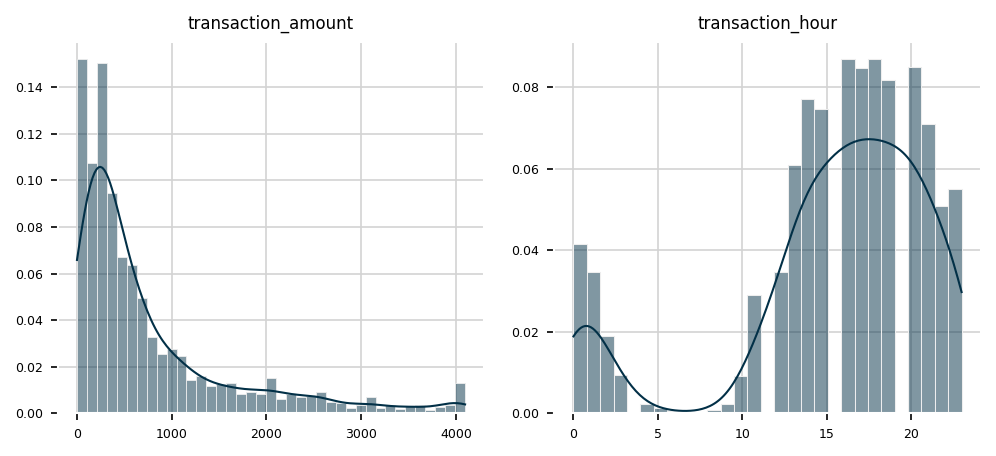

In [7]:
edag.analysis_plots(data=df, features=numeric_features, kde=True)

---

💡 **Insights:**

`transaction_amount`: O valor das transações apresenta forte assimetria à direita, com a maioria concentrada abaixo de R$500. Essa cauda longa sugere que poucas transações têm valores muito altos, o que pode indicar pontos de atenção para fraude.

`transaction_hour`: Mostra uma distribuição com baixa atividade nas primeiras horas da manhã e picos entre 14h e 21h, coincidindo com o horário comercial e início da noite.

---

### 3.2.2. Tabelas de frequência

In [8]:
transaction_amount_tf = edag.frequency_tables(df, features=['transaction_amount'], start=0, step=500)

,transaction_amount,Frequência Absoluta,Frequência Relativa,Frequência Acumulada
0,0.0-500.0,1779,55.61%,55.61%
1,500.0-1000.0,640,20.01%,75.62%
2,1000.0-1500.0,263,8.22%,83.84%
3,1500.0-2000.0,160,5.0%,88.84%
4,2000.0-2500.0,135,4.22%,93.06%
5,2500.0-3000.0,80,2.5%,95.56%
6,3000.0-3500.0,56,1.75%,97.31%
7,3500.0-4000.0,45,1.41%,98.72%
8,4000.0-4500.0,41,1.28%,100.0%


---

💡 **Insights:**

<span>Mais da metade das transações (55,6%) estão na faixa de até `R$500`, e cerca de 75% até `R$1000`. A partir de `R$2500`, as operações são raras (<5%), o que reforça o comportamento de long tail.</span>
Essas faixas podem servir de base inicial para definição de bins ou regras de alerta.

---

In [9]:
transaction_hour_tf = edag.frequency_tables(df, features=['transaction_hour'], step=1, show=True, max_edge=24, wrap_cycle=24)

,transaction_hour,Frequência Absoluta,Frequência Relativa,Frequência Acumulada
0,0-1,133,4.16%,4.16%
1,1-2,111,3.47%,7.63%
2,2-3,61,1.91%,9.53%
3,3-4,30,0.94%,10.47%
4,4-5,7,0.22%,10.69%
5,5-6,4,0.13%,10.82%
6,6-7,2,0.06%,10.88%
7,7-8,0,0.0%,10.88%
8,8-9,3,0.09%,10.97%
9,9-10,7,0.22%,11.19%


---

💡 **Insights:**

Observa-se baixa incidência de transações entre 0h e 8h (menos de 10% do total), com crescimento gradual a partir das 12h e pico entre 14h e 21h (~50% das operações). 
Esse padrão temporal será útil para analisar comportamento noturno, potencialmente mais arriscado.

---


### 3.2.3. Boxplot e Análise de Outliers

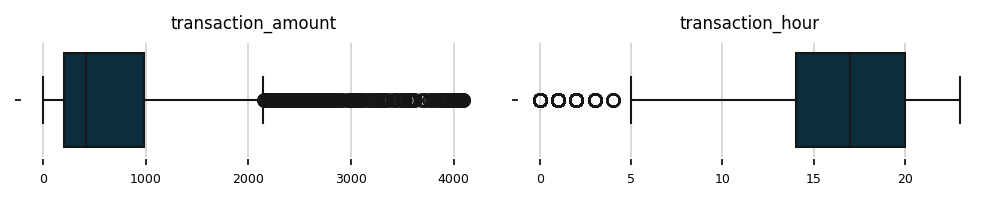

In [10]:
edag.analysis_plots(data=df, features=numeric_features, outliers=True)

In [11]:
df[numeric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_amount,3199.0,767.812904,889.095904,1.22,205.235,415.94,981.68,4097.21
transaction_hour,3199.0,15.495780,5.966597,0.00,14.000,17.00,20.00,23.00


In [12]:
outlier_indexes, outlier_counts, total_outliers = edag.check_outliers(data=df, features=numeric_features)

There are 639 outliers in the dataset.

Number (percentage) of outliers per feature: 

transaction_amount: 297 (9.28)%
transaction_hour: 342 (10.69)%


---

💡 **Insights:**

`transaction_amount`: Possui uma dispersão alta devido outliers, sendo importante avaliar se essas operações concentram fraudes.  
`transaction_hour`: Apresenta poucos outliers, o que indica um comportamento mais estável.

---

## 3.3. Análise Univariada - Variáveis categóricas

In [13]:
barplot_features = discrete_numeric_as_categorical + categorical_features

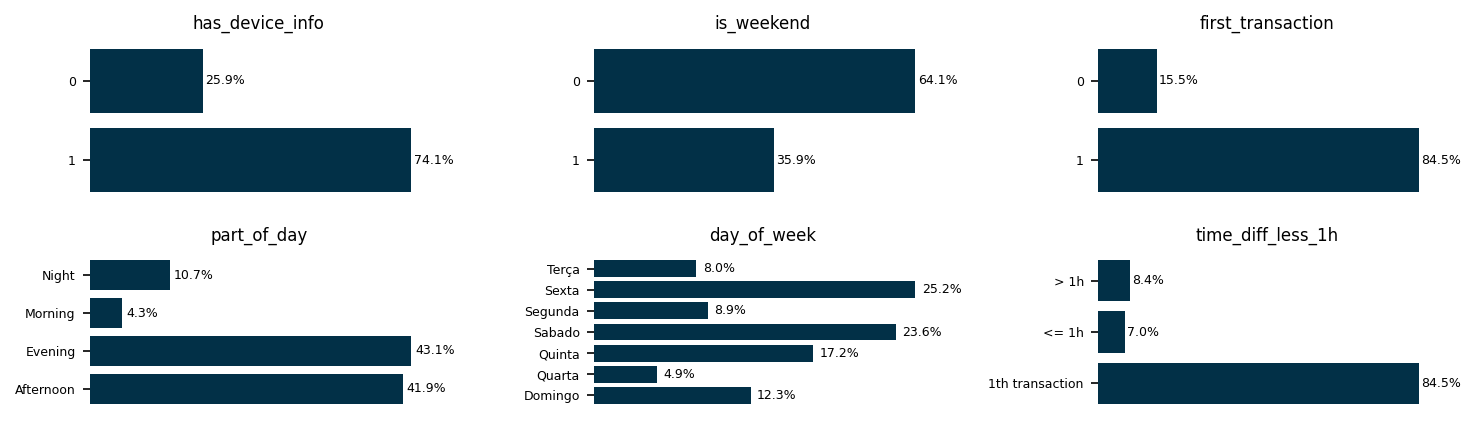

In [14]:
edag.analysis_plots(data=df, features=barplot_features, barplot=True)

---

💡 **Insights:**

- `has_device_info`: 74% possuem dados de dispositivo, o que indica boa rastreabilidade.
- `is_weekend`: 36% das transações ocorrem em fins de semana, investigar se o risco aumenta nesses dias.
- `first_transaction`: 84% são primeiras transações do usuário, sugerindo que muitos usuários realizaram apenas uma transação no período, aumentando dessa forma o risco de fraudes únicas.
- `part_of_day`: Predominância de tarde e noite (~85%), o que reforça o padrão observado em `transaction_hour`.
- `day_of_week`: Atividade cresce ao longo da semana, pico na sexta (25,2%) sendo seguida por sabado (23,6%), indicando preparação para o fim de semana.
- `time_diff_less_1h`: 7% de compras são realizadas com diferença de 1h ou menos que a anterior, transações com intervalo curto merece atenção por poder representar tentativas sequenciais suspeitas.

---

## 3.4. Análise Bivariada - Relação com Fraude

Iremos investigar como cada variável se relaciona diretamente com o target `has_cbk`, comparando o comportamento de transações legítimas e fraudulentas.

O objetivo é identificar padrões discriminativos, avaliar a intensidade dessas relações e entender quais sinais realmente aumentam o risco de fraude quando observados isoladamente.

Para facilitar a interpretação e gerar insights acionáveis, as variáveis serão analisadas por temas de negócio, conectando comportamento do usuário, padrões temporais e características das transações aos eventos de fraude.

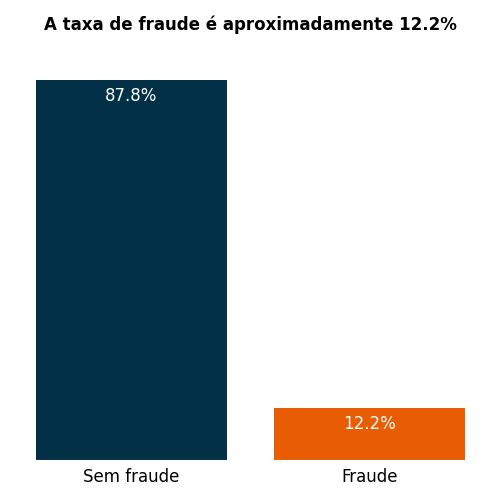

In [15]:
edag.plot_binary_distribution(
        df,
        target_column='has_cbk',
        title='A taxa de fraude é aproximadamente 12.2%',
        title_position='center',
        labels={0: 'Sem fraude', 1: 'Fraude'},
        colors={0: '#023047', 1: '#e85d04'},
        reverse_order=True,
        figsize=(3.5, 3.5)
    )

In [16]:
legit = df[df['has_cbk'] == 0]
fraud = df[df['has_cbk'] == 1]

legit_x_fraud = pd.DataFrame({
    'Métrica': ['Total', 'Média', 'Mediana', 'Desvio Padrão', 'Valor Mín', 'Valor Máx', 'Clientes Únicos'],
    
    'Legítimos': [len(legit), 
                  legit['transaction_amount'].mean(), 
                  legit['transaction_amount'].median(), 
                  legit['transaction_amount'].std(), 
                  legit['transaction_amount'].min(), 
                  legit['transaction_amount'].max(), 
                  legit['user_id'].nunique()],
    
    'Fraudadores': [len(fraud), 
                    fraud['transaction_amount'].mean(), 
                    fraud['transaction_amount'].median(), 
                    fraud['transaction_amount'].std(), 
                    fraud['transaction_amount'].min(), 
                    fraud['transaction_amount'].max(), 
                    fraud['user_id'].nunique()],
    
    'Diff': [len(fraud)/len(legit), 
                  fraud['transaction_amount'].mean()/legit['transaction_amount'].mean(), 
                  fraud['transaction_amount'].median()/legit['transaction_amount'].median(), 
                  fraud['transaction_amount'].std()/legit['transaction_amount'].std(),
                  fraud['transaction_amount'].min()/legit['transaction_amount'].min(),
                  fraud['transaction_amount'].max()/legit['transaction_amount'].max(),
                  fraud['transaction_amount'].nunique()/legit['transaction_amount'].nunique()]
})

legit_x_fraud.round(2)

,Métrica,Legítimos,Fraudadores,Diff
0,Total,2808.00,391.00,0.14
1,Média,672.32,1453.57,2.16
2,Mediana,360.32,999.47,2.77
3,Desvio Padrão,797.46,1169.49,1.47
4,Valor Mín,1.22,2.89,2.37
5,Valor Máx,4091.83,4097.21,1.00
6,Clientes Únicos,2584.00,153.00,0.14


---

💡 **Insights:**

A taxa de fraude no dataset é de aproximadamente 12,2%, indicando um cenário moderadamente desbalanceado, porém realista para problemas de fraude.

Transações fraudulentas apresentam valores significativamente mais altos do que as legítimas, com média e mediana mais que o dobro, além de maior dispersão.

Apesar de representarem uma parcela menor das transações, as fraudes concentram valores elevados e comportamento mais extremo, reforçando o valor monetário como um sinal relevante para diferenciação entre transações legítimas e fraudulentas.

---

### **3.4.1. Valores de Transação**

Nesta seção analisaremos como o valor financeiro das transações se relaciona com a ocorrência de fraude. O objetivo é identificar se fraudes tendem a se concentrar em valores mais altos, extremos ou fora do padrão esperado, avaliando seu potencial discriminativo para o score de risco.

**Variáveis analisadas:**
- `transaction_amount` (numérica)
- `first_transaction` (binária)

#### Variáveis Numéricas

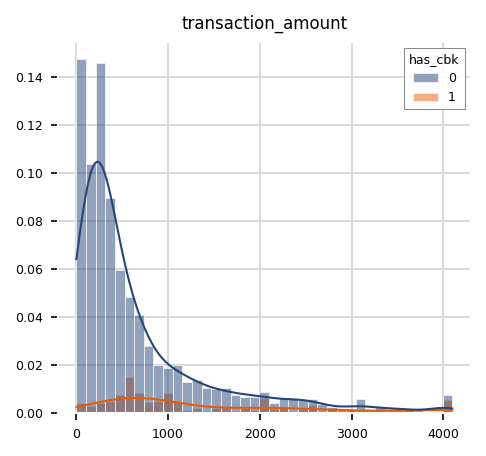

In [17]:
edag.analysis_plots(data=df, features=['transaction_amount'], histplot=True, kde=True, hue=target)

---

💡 **Insights:** `Distribuição e Padrão de Fraude`

Como já foi visto, a distribuição geral é fortemente assimétrica à direita, ao segmentar por `has_cbk`, percebe-se que fraudes tendem a ocorrer em faixas de valor mais altas.

Isso mostra que quanto maior o valor da transação, maior a probabilidade de estorno (chargeback), comportamento típico de fraude oportunista.

---


────────────────────────────────────────────────────────────────────────────────
Análise Bivariada Numérica: transaction_amount
────────────────────────────────────────────────────────────────────────────────



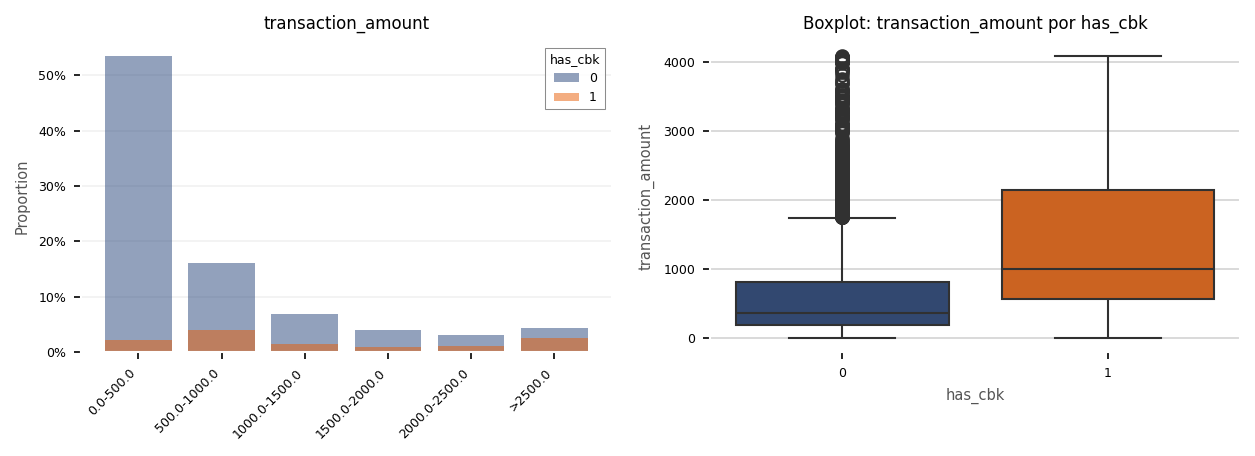



────────────────────────────────────────────────────────────────────────────────
Estatísticas Descritivas por has_cbk: transaction_amount
────────────────────────────────────────────────────────────────────────────────


,has_cbk,count,mean,std,min,25%,50%,75%,max
0,0,2808,672.32,797.46,1.22,191.28,360.32,812.58,4091.83
1,1,391,1453.57,1169.49,2.89,565.58,999.47,2140.68,4097.21




────────────────────────────────────────────────────────────────────────────────
Tabela de Análise de Risco: transaction_amount
────────────────────────────────────────────────────────────────────────────────


,transaction_amount,N Transações,N Has_cbk,Taxa Has_cbk,Risco Relat.
0,0.0-500.0,1779,69,3.9%,0.32x
1,500.0-1000.0,640,127,19.8%,1.62x
2,1000.0-1500.0,263,45,17.1%,1.4x
3,1500.0-2000.0,160,30,18.8%,1.53x
4,2000.0-2500.0,135,37,27.4%,2.24x
5,>2500.0,222,83,37.4%,3.06x
6,TOTAL,3199,391,12.2%,1.00x


In [18]:
rt_t_a_num = edag.num_binary_analysis(data=df, features=['transaction_amount'], hue=target, start=0, step=500, tail_cutoff=2500)

---

💡 **Insights:** `transaction_amount`

As transações fraudulentas são, em média, mais que o dobro do valor das legítimas, e o desvio-padrão também é maior, o que confirma maior dispersão entre valores suspeitos.\
O boxplot reforça esse padrão: o grupo `has_cbk = 1` apresenta mediana e amplitude mais altas.

Conforme o valor aumenta, o risco cresce acompanhando, chegando a 4.5x mais risco em compras na faixa de `R$3.500 ~ R$4.000`.

Isso indica que a variável `transaction_amount` pode ser excelente preditora, justificando a criação de feature derivadas.

---

#### Variáveis Categóricas


────────────────────────────────────────────────────────────────────────────────
Análise Bivariada Categórica: first_transaction
────────────────────────────────────────────────────────────────────────────────



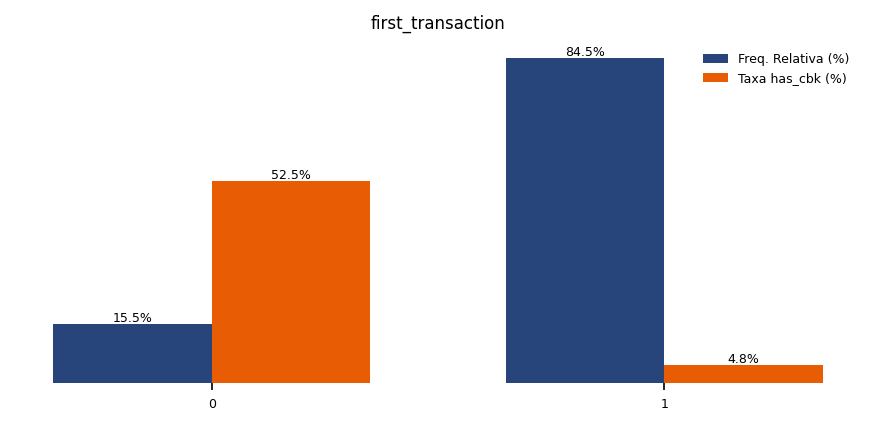


────────────────────────────────────────────────────────────────────────────────
Tabela de Análise de Risco: first_transaction
────────────────────────────────────────────────────────────────────────────────



,first_transaction,N Transações,N Has_cbk,Taxa Has_cbk,Risco Relat.
0,0,495,260,52.5%,4.3x
1,1,2704,131,4.8%,0.4x
2,TOTAL,3199,391,12.2%,1.00x


In [19]:
rt_t_a_cat = edag.cat_binary_analysis(data=df, features=['first_transaction'], hue=target, figsize=(6,3))

---

💡 **Insights:** `first_transaction`

A maior parte das transações (84,5%) corresponde a primeiras compras (first_transaction = 1), e apenas 15,5% são subsequentes.

Embora as primeiras transações sejam maioria, as fraudes ocorrem proporcionalmente muito mais em transações recorrentes (ou seja, quando o usuário já realizou uma operação anterior).\
Esse resultado reforça a importância dessa variável na predição de fraudes.

---

### **3.4.2. Padrões Temporais**

Nesta seção analisaremos quando as transações ocorrem, explorando horários, períodos do dia e dias da semana. A análise busca identificar janelas temporais com maior incidência de fraude, avaliando se o fator tempo contribui para diferenciar comportamentos legítimos e fraudulentos.

**Variáveis analisadas:**
- `transaction_hour` (numérica)
- `time_diff_less_1h` (categórica)
- `is_weekend` (Binária)
- `part_of_day` (categórica)
- `day_of_week` (categórica)

#### **Variáveis Numéricas**

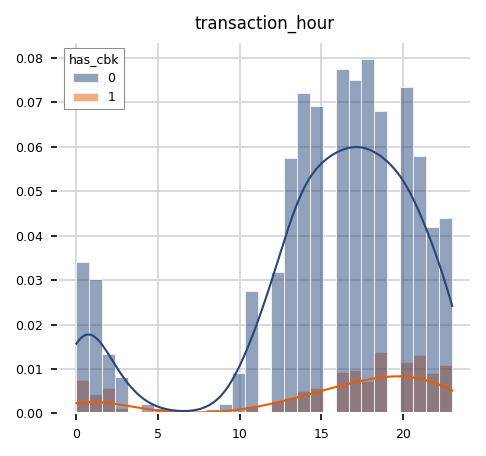

In [20]:
edag.analysis_plots(data=df, features=['transaction_hour'], histplot=True, kde=True, hue=target)


────────────────────────────────────────────────────────────────────────────────
Análise Bivariada Numérica: transaction_hour
────────────────────────────────────────────────────────────────────────────────



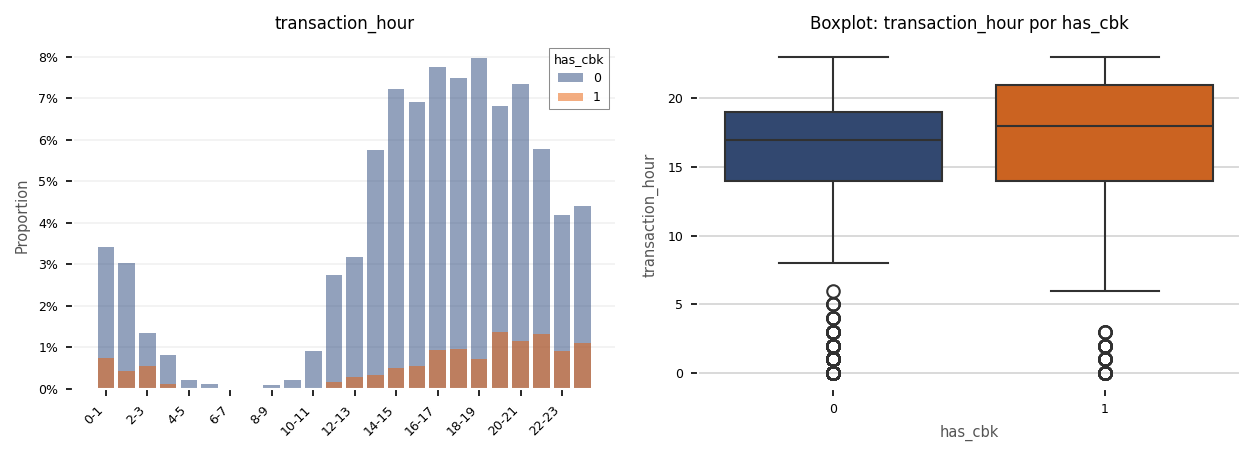



────────────────────────────────────────────────────────────────────────────────
Estatísticas Descritivas por has_cbk: transaction_hour
────────────────────────────────────────────────────────────────────────────────


,has_cbk,count,mean,std,min,25%,50%,75%,max
0,0,2808,15.45,5.81,0.0,14.0,17.0,19.0,23.0
1,1,391,15.83,6.97,0.0,14.0,18.0,21.0,23.0




────────────────────────────────────────────────────────────────────────────────
Tabela de Análise de Risco: transaction_hour
────────────────────────────────────────────────────────────────────────────────


,transaction_hour,N Transações,N Has_cbk,Taxa Has_cbk,Risco Relat.
0,0-1,133,24,18.0%,1.48x
1,1-2,111,14,12.6%,1.03x
2,2-3,61,18,29.5%,2.41x
3,3-4,30,4,13.3%,1.09x
4,4-5,7,0,0.0%,0.0x
5,5-6,4,0,0.0%,0.0x
6,6-7,2,1,50.0%,4.09x
7,7-8,0,0,nan%,nanx
8,8-9,3,0,0.0%,0.0x
9,9-10,7,0,0.0%,0.0x


In [21]:
rt_temp_num = edag.num_binary_analysis(data=df, features='transaction_hour', hue=target, start=0, step=1, wrap_cycle=24, max_edge=24)

---

💡 **Insights:** `transaction_hour`

Existe uma concentração de transações entre 12h e 22h, refletindo o horário comercial estendido e hábitos de consumo comuns.
No entanto, observam-se picos de fraude entre 19h e 2h, isso indica um comportamento de fraude noturna, possivelmente associado a menor vigilância de sistemas ou horários em que usuários estão inativos.

---

#### **Variáveis Categóricas**


────────────────────────────────────────────────────────────────────────────────
Análise Bivariada Categórica: time_diff_less_1h
────────────────────────────────────────────────────────────────────────────────



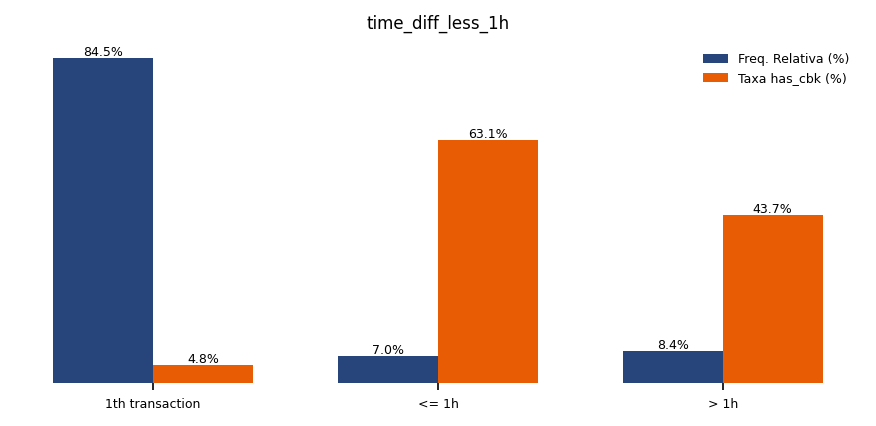


────────────────────────────────────────────────────────────────────────────────
Tabela de Análise de Risco: time_diff_less_1h
────────────────────────────────────────────────────────────────────────────────



,time_diff_less_1h,N Transações,N Has_cbk,Taxa Has_cbk,Risco Relat.
0,1th transaction,2704,131,4.8%,0.4x
1,<= 1h,225,142,63.1%,5.16x
2,> 1h,270,118,43.7%,3.58x
3,TOTAL,3199,391,12.2%,1.00x





────────────────────────────────────────────────────────────────────────────────
Análise Bivariada Categórica: is_weekend
────────────────────────────────────────────────────────────────────────────────



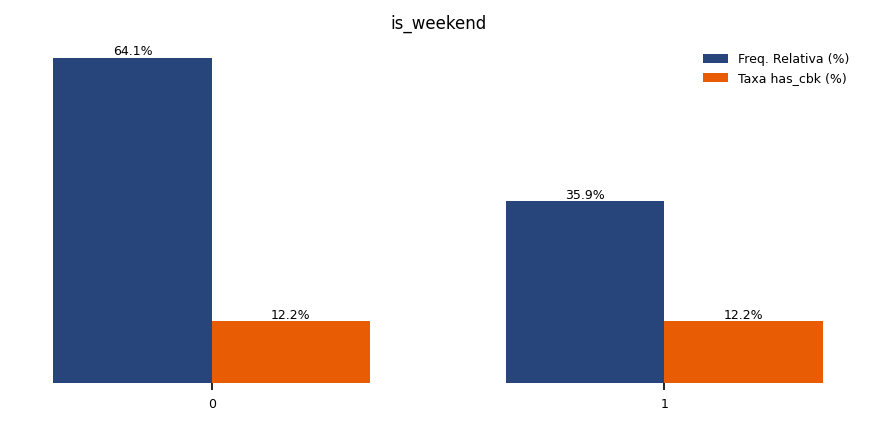


────────────────────────────────────────────────────────────────────────────────
Tabela de Análise de Risco: is_weekend
────────────────────────────────────────────────────────────────────────────────



,is_weekend,N Transações,N Has_cbk,Taxa Has_cbk,Risco Relat.
0,0,2051,251,12.2%,1.0x
1,1,1148,140,12.2%,1.0x
2,TOTAL,3199,391,12.2%,1.00x





────────────────────────────────────────────────────────────────────────────────
Análise Bivariada Categórica: part_of_day
────────────────────────────────────────────────────────────────────────────────



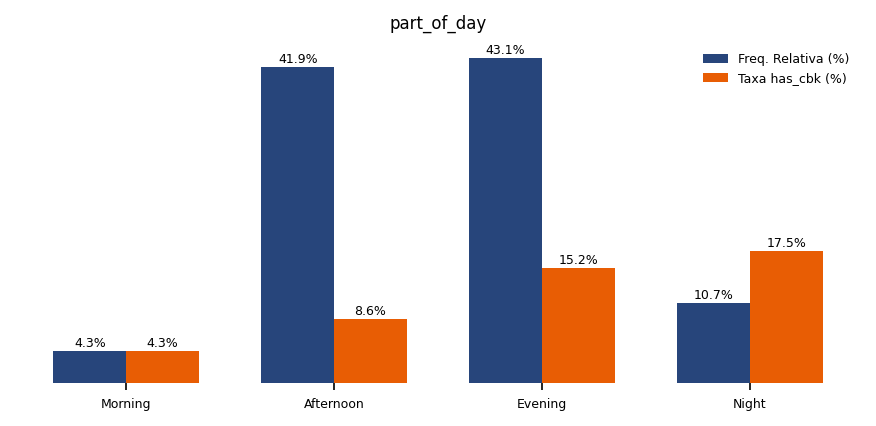


────────────────────────────────────────────────────────────────────────────────
Tabela de Análise de Risco: part_of_day
────────────────────────────────────────────────────────────────────────────────



,part_of_day,N Transações,N Has_cbk,Taxa Has_cbk,Risco Relat.
0,Morning,138,6,4.3%,0.36x
1,Afternoon,1341,115,8.6%,0.7x
2,Evening,1378,210,15.2%,1.25x
3,Night,342,60,17.5%,1.44x
4,TOTAL,3199,391,12.2%,1.00x





────────────────────────────────────────────────────────────────────────────────
Análise Bivariada Categórica: day_of_week
────────────────────────────────────────────────────────────────────────────────



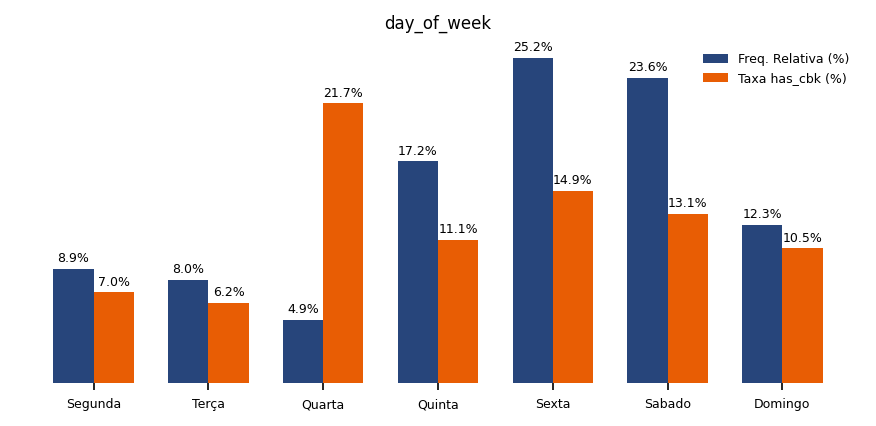


────────────────────────────────────────────────────────────────────────────────
Tabela de Análise de Risco: day_of_week
────────────────────────────────────────────────────────────────────────────────



,day_of_week,N Transações,N Has_cbk,Taxa Has_cbk,Risco Relat.
0,Segunda,284,20,7.0%,0.58x
1,Terça,256,16,6.2%,0.51x
2,Quarta,157,34,21.7%,1.77x
3,Quinta,549,61,11.1%,0.91x
4,Sexta,805,120,14.9%,1.22x
5,Sabado,756,99,13.1%,1.07x
6,Domingo,392,41,10.5%,0.86x
7,TOTAL,3199,391,12.2%,1.00x


In [22]:
order_temp = {'part_of_day': ['Morning', 'Afternoon', 'Evening', 'Night'], 
                  'day_of_week': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo']}
rt_temp_cat = edag.cat_binary_analysis(data=df, features=['time_diff_less_1h', 'is_weekend', 'part_of_day', 'day_of_week'], hue=target, figsize=(6,3), category_order=order_temp)

---

💡 **Insights:** 

`time_diff_less_1h` (tempo desde a última transação)

- 84,5% das transações são primeiras transações do usuário, nelas a taxa de fraude é baixa (4,8%).
- Já nas transações realizadas em menos de 1 hora desde a anterior, o risco aumenta para 63,1% (5,16x) e em superiores a 1 hora apresentam 43,7% de taxa de fraude (3,58x).

Fraudadores tendem a realizar várias tentativas em sequência, provavelmente testando limites do cartão ou validando comportamento do antifraude.

Esse padrão é altamente discriminativo e deve ser priorizado na modelagem.

`is_weekend` (fim de semana)

- A proporção de transações se divide entre 64% durante a semana e 36% no fim de semana.
- A taxa de fraude é a mesma (12,2%) em ambos os períodos.

Não há indício de diferença significativa no risco entre dias úteis e fim de semana.

`part_of_day` (parte do dia)

- O risco aumenta progressivamente ao longo do dia, atingindo o pico no período da madrugada (17,5%).

Fraudes concentram-se em horários de menor vigilância, comportamento consistente com `transaction_hour`.

A variável reforça a importância do padrão temporal de risco.

`day_of_week` (dia da semana)

- O maior risco ocorre às quartas-feiras, com mais que o dobro da taxa média (21,7%), um padrão não-intuitivo.

---

### **3.4.3. Comportamento do Usuário**

Nesta seção analisaremos o histórico e o padrão de uso dos usuários, como recorrência, volume de transações, uso de múltiplos cartões ou dispositivos. O foco é entender se fraudes apresentam comportamentos mais intensos, concentrados ou inconsistentes quando comparados a usuários legítimos.

Para isso, construiremos uma nova tabela agregada no nível de usuário, permitindo avaliar padrões que não são visíveis na análise transação a transação.

**Análises realizadas:**
- `Comparação do perfil de usuários legítimos vs. fraudulentos`
- `Avaliação do risco associado ao uso de múltiplos dispositivos`
- `Avaliação do risco associado ao uso de múltiplos cartões`
- `Análise de faixas de recorrência e concentração de fraudes`

Usuários com apenas uma transação não possuem variação de valor, o que resulta em NaN no desvio-padrão. Esses casos foram substituídos por 0, representando ausência de variação. Essa abordagem permite comparar de forma consistente todos os perfis, incluindo usuários de transação única, sem distorcer as médias gerais.

In [41]:
user_profile = df.groupby('user_id').agg({
    'transaction_amount': ['mean', 'std', 'min', 'max'],
    'transaction_id': 'count',
    'has_cbk': 'sum',
    'hash_card_number': 'nunique',
    'device_id': 'nunique',
    'merchant_id': 'nunique'
}).reset_index()

user_profile.columns = ['user_id', 'mean_value', 'std_value', 'min_value', 'max_value', 
                        'trans_total', 'total_fraud', 'cards', 'devices', 'merchants']

user_profile['fraud_rate'] = (user_profile['total_fraud']/user_profile['trans_total'] * 100).round(2)

user_profile['std_value'] = user_profile['std_value'].fillna(0)

user_profile.sort_values(by=['total_fraud'], ascending=False).head()

,user_id,mean_value,std_value,min_value,max_value,trans_total,total_fraud,cards,devices,merchants,fraud_rate
302,11750,574.718065,126.028873,10.46,688.87,31,25,31,4,2,80.65
2448,91637,787.977727,192.152996,550.05,1416.70,22,19,22,1,1,86.36
2103,79054,2088.113529,653.914911,469.97,3165.49,17,15,15,1,4,88.24
2582,96025,2157.158571,697.402386,50.71,2904.60,14,13,10,1,3,92.86
2085,78262,3015.010000,1415.753326,943.14,4097.21,13,12,10,1,3,92.31


In [24]:
report_02 = prof.profile_df(user_profile)
report_02

,col,dtype,n_rows,n_null,pct_null,n_unique,cardinality_ratio,dup_rate_col,sample_values,has_mixed_types,min,max
0,user_id,int64,2704,0,0.0,2704,1.0000,0.0000,"[6, 7, 8, 19, 132]",False,6.000000,99974.000000
1,mean_value,float64,2704,0,0.0,2658,0.9830,0.0170,"[443.9, 359.68, 2416.7, 165.14, 714.56]",False,1.563333,4080.030000
2,std_value,float64,2704,0,0.0,236,0.0873,0.9127,"[0.0, 0.0, 0.0, 0.0, 0.0]",False,0.000000,2783.617768
3,min_value,float64,2704,0,0.0,2643,0.9774,0.0226,"[443.9, 359.68, 2416.7, 165.14, 714.56]",False,1.220000,4080.030000
4,max_value,float64,2704,0,0.0,2652,0.9808,0.0192,"[443.9, 359.68, 2416.7, 165.14, 714.56]",False,1.750000,4097.210000
5,trans_total,int64,2704,0,0.0,15,0.0055,0.9945,"[1, 1, 1, 1, 1]",False,1.000000,31.000000
6,total_fraud,int64,2704,0,0.0,14,0.0052,0.9948,"[0, 0, 0, 0, 0]",False,0.000000,25.000000
7,cards,int64,2704,0,0.0,11,0.0041,0.9959,"[1, 1, 1, 1, 1]",False,1.000000,31.000000
8,devices,int64,2704,0,0.0,4,0.0015,0.9985,"[1, 1, 1, 1, 1]",False,1.000000,4.000000
9,merchants,int64,2704,0,0.0,4,0.0015,0.9985,"[1, 1, 1, 1, 1]",False,1.000000,4.000000


#### **Usuários Legítimos vs. Fraudulentos**

In [25]:
# Separar usuários
usuarios_legitimos = user_profile[user_profile['fraud_rate'] == 0]
usuarios_fraudadores = user_profile[(user_profile['fraud_rate'] > 0)]
usuarios_100pct_fraude = user_profile[user_profile['fraud_rate'] == 100.0]

print("="*70)
print("COMPARAÇÃO: PERFIL LEGÍTIMO vs FRAUDADOR")
print("="*70)

comparacao = pd.DataFrame({
    'Métrica': ['Total Usuários', 'Média Transações', 'Média Cartões', 'Média Dispositivos', 
                'Média Merchants', 'Média Valor Transação', 'Desvio Padrão Valor'],
    'Legítimos': [
        len(usuarios_legitimos),
        usuarios_legitimos['trans_total'].mean(),
        usuarios_legitimos['cards'].mean(),
        usuarios_legitimos['devices'].mean(),
        usuarios_legitimos['merchants'].mean(),
        usuarios_legitimos['mean_value'].mean(),
        usuarios_legitimos['std_value'].mean()
    ],
    'Fraudadores (>0%)': [
        len(usuarios_fraudadores),
        usuarios_fraudadores['trans_total'].mean(),
        usuarios_fraudadores['cards'].mean(),
        usuarios_fraudadores['devices'].mean(),
        usuarios_fraudadores['merchants'].mean(),
        usuarios_fraudadores['mean_value'].mean(),
        usuarios_fraudadores['std_value'].mean()
    ],
    'Fraudadores (100%)': [
        len(usuarios_100pct_fraude),
        usuarios_100pct_fraude['trans_total'].mean(),
        usuarios_100pct_fraude['cards'].mean(),
        usuarios_100pct_fraude['devices'].mean(),
        usuarios_100pct_fraude['merchants'].mean(),
        usuarios_100pct_fraude['mean_value'].mean(),
        usuarios_100pct_fraude['std_value'].mean()
    ]
}).round(1)

comparacao

COMPARAÇÃO: PERFIL LEGÍTIMO vs FRAUDADOR


,Métrica,Legítimos,Fraudadores (>0%),Fraudadores (100%)
0,Total Usuários,2551.0,153.0,120.0
1,Média Transações,1.1,3.0,2.0
2,Média Cartões,1.0,2.2,1.3
3,Média Dispositivos,1.0,1.1,1.1
4,Média Merchants,1.0,1.2,1.1
5,Média Valor Transação,659.2,1555.5,1695.5
6,Desvio Padrão Valor,18.3,339.6,278.2


---

💡 **Insights:** `COMPARAÇÃO: PERFIL LEGÍTIMO vs FRAUDADOR`

- Usuários fraudulentos realizam ~3x mais transações que os legítimos, com valores médios mais que dobrados.
- O desvio-padrão do valor também é bem maior, indicando comportamento com maior variação.
- O número de cartões utilizados é 2x maior entre os fraudulentos quando comparado aos legítimos, sugerindo teste de múltiplos cartões.

---

#### **Uso de Múltiplos Dispositivos**

In [26]:
# Análise: Múltiplos dispositivos aumentam risco?
print("─"*70)
print("ANÁLISE: MÚLTIPLOS DISPOSITIVOS E RISCO")
print("─"*70)

# Criar faixas
user_profile['faixa_devices'] = pd.cut(user_profile['devices'], 
                                       bins=[0, 1, 100],
                                       labels=['1 device', '2+ devices']) 
                                              

analise_devices = user_profile.groupby('faixa_devices').agg({
    'user_id': 'count',
    'total_fraud': 'sum',
    'fraud_rate': 'mean'
}).round(1).reset_index()

analise_devices.columns = ['faixa_devices', 'Qtd_Usuarios', 'Total_Fraudes', 'Taxa_Media_Fraude']

analise_devices

──────────────────────────────────────────────────────────────────────
ANÁLISE: MÚLTIPLOS DISPOSITIVOS E RISCO
──────────────────────────────────────────────────────────────────────


,faixa_devices,Qtd_Usuarios,Total_Fraudes,Taxa_Media_Fraude
0,1 device,2669,313,4.8
1,2+ devices,35,78,37.4


---

💡 **Insights:** `ANÁLISE: MÚLTIPLOS DISPOSITIVOS E RISCO`

- Apesar de poucos dados, podemos identificar um crescimento no risco, conforme o número de dispositivos aumenta.
- Reforçando o que vimos na `COMPARAÇÃO: PERFIL LEGÍTIMO vs FRAUDADOR`, podemos classificar essa métrica como altamente discriminativa.

---

#### **Uso de Múltiplos Cartões**

In [27]:
# Análise: Múltiplos cartões aumentam risco?
print("─"*70)
print("ANÁLISE: MÚLTIPLOS CARTÕES E RISCO")
print("─"*70)

# Criar faixas
user_profile['faixa_cards'] = pd.cut(user_profile['cards'], 
                                       bins=[0, 1, 2, 3, 100],
                                       labels=['1 card', '2 cards', 
                                              '3 cards', '4+ cards'])

analise_cards = user_profile.groupby('faixa_cards').agg({
    'user_id': 'count',
    'total_fraud': 'sum',
    'fraud_rate': 'mean'
}).round(1).reset_index()

analise_cards.columns = ['Faixa_cards', 'Qtd_Usuarios', 'Total_Fraudes', 'Taxa_Media_Fraude']

analise_cards

──────────────────────────────────────────────────────────────────────
ANÁLISE: MÚLTIPLOS CARTÕES E RISCO
──────────────────────────────────────────────────────────────────────


,Faixa_cards,Qtd_Usuarios,Total_Fraudes,Taxa_Media_Fraude
0,1 card,2590,159,3.7
1,2 cards,77,63,29.1
2,3 cards,15,34,56.6
3,4+ cards,22,135,57.7


---

💡 **Insights:** `ANÁLISE: MÚLTIPLOS CARTÕES E RISCO`

- Usuários com mais de um cartão apresentam risco 8-15x maior.
- A incidência de fraude cresce rapidamente a partir do segundo cartão, chegando a ~58% nos perfis com 4 ou mais cartões.
- Reforçando o que vimos na `COMPARAÇÃO: PERFIL LEGÍTIMO vs FRAUDADOR`, podemos classificar essa métrica como altamente discriminativa.

Esse padrão indica tentativas de reutilização de credenciais, possivelmente associadas a contas comprometidas ou fraudadores que testam múltiplos cartões até encontrar um funcional.


---

#### **Faixas de Recorrência de Fraudes**

In [28]:
# Análise: Múltiplos cartões aumentam risco?
print("─"*70)
print("ANÁLISE: FAIXAS DE FRAUDE")
print("─"*70)

# Criar faixas
user_profile['faixa_fraud_rate'] = pd.cut(user_profile['fraud_rate'], 
                                       bins=[0, 1, 25, 50, 75, 99, 100],
                                       labels=['0% fraude', '1-25% fraude', '25-50% fraude', 
                                              '50-75% fraude', '75-99% fraude', '100% fraude'], include_lowest=True)

analise_fraud_rate = user_profile.groupby('faixa_fraud_rate').agg({
    'user_id': 'count',
    'total_fraud': 'sum'
}).round(1).reset_index()

analise_fraud_rate.columns = ['Faixa_fraud_rate', 'Qtd_Usuarios', 'Total_Fraudes']

analise_fraud_rate

──────────────────────────────────────────────────────────────────────
ANÁLISE: FAIXAS DE FRAUDE
──────────────────────────────────────────────────────────────────────


,Faixa_fraud_rate,Qtd_Usuarios,Total_Fraudes
0,0% fraude,2551,0
1,1-25% fraude,2,2
2,25-50% fraude,11,16
3,50-75% fraude,13,42
4,75-99% fraude,7,92
5,100% fraude,120,239


---

💡 **Insights:** `ANÁLISE: FAIXAS DE FRAUDE`

- 120 usuários (~4%) são totalmente fraudulentos, respondendo por 61% de todas as fraudes.
- Apenas 33 usuários têm comportamento parcialmente legítimo, indicando que a maioria dos fraudadores mantém padrão persistente de fraude, o que facilita a detecção via perfis de histórico e agregação por usuário.

---

### **3.4.4. Outros Temas Relevantes**

Por fim, analisamos variáveis complementares que não se enquadram diretamente nos grupos anteriores, mas que podem capturar sinais adicionais de risco. Essas features são avaliadas individualmente quanto à sua relação com fraude e ao seu potencial valor informativo para a modelagem.

**Variáveis analisadas:**
- `has_device_info` (Categórica)

#### **Variáveis Categóricas**


────────────────────────────────────────────────────────────────────────────────
Análise Bivariada Categórica: has_device_info
────────────────────────────────────────────────────────────────────────────────



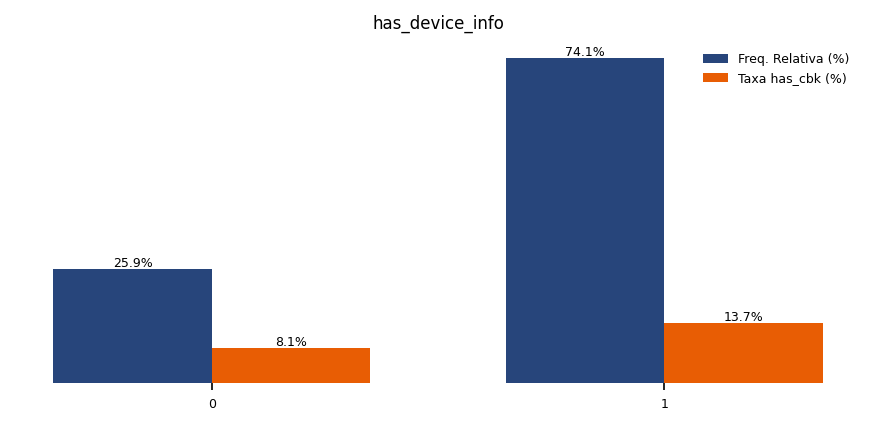


────────────────────────────────────────────────────────────────────────────────
Tabela de Análise de Risco: has_device_info
────────────────────────────────────────────────────────────────────────────────



,has_device_info,N Transações,N Has_cbk,Taxa Has_cbk,Risco Relat.
0,0,830,67,8.1%,0.66x
1,1,2369,324,13.7%,1.12x
2,TOTAL,3199,391,12.2%,1.00x


In [29]:
rt_others_cat = edag.cat_binary_analysis(data=df, features=['has_device_info'], hue=target, figsize=(6,3))

---

💡 **Insights:** `has_device_info`

- 74% das transações contêm informações de dispositivo (has_device_info = 1), enquanto 26% não as possuem.
- As transações sem identificação de dispositivo têm uma taxa de fraude menor (8,1%), enquanto as que possuem device info apresentam 13,7%, um aumento relativo de +69% no risco.

A presença de informações de dispositivo não garante legitimidade, pois fraudadores sofisticados replicam padrões reais de `device_info` para enganar sistemas heurísticos.\
Logo, o campo has_device_info isoladamente não tem um grande poder discriminativo.

---

## 3.5. Consolidação de Descobertas

### **3.5.1. Tabela geral de risco relativo** 

'Comportamento do usuário' não está incluido nessa tabela consolidada de risco relativo, pois terá uma análise mais detalhada na seção 4.


In [30]:
total_rt = edag.consolidate_risk_tables(tables=[rt_t_a_num['risk_tables'], rt_t_a_cat, 
                                                rt_temp_num['risk_tables'], rt_temp_cat, 
                                                rt_others_cat])
total_rt.head(10)

,feature,bin,n_total,n_has_cbk,has_cbk_rate,relative_risk,priority
0,time_diff_less_1h,<= 1h,225,142,63.1%,5.16,CRÍTICA
1,first_transaction,0,495,260,52.5%,4.30,CRÍTICA
2,transaction_hour,6-7,2,1,50.0%,4.09,CRÍTICA
3,time_diff_less_1h,> 1h,270,118,43.7%,3.58,CRÍTICA
4,transaction_amount,>2500.0,222,83,37.4%,3.06,CRÍTICA
5,transaction_hour,2-3,61,18,29.5%,2.41,ALTA
6,transaction_amount,2000.0-2500.0,135,37,27.4%,2.24,ALTA
7,day_of_week,Quarta,157,34,21.7%,1.77,MÉDIA
8,transaction_hour,23-0,176,35,19.9%,1.63,MÉDIA
9,transaction_amount,500.0-1000.0,640,127,19.8%,1.62,MÉDIA


---

💡 **Insights:**

A consolidação confirma que as variáveis `time_diff_less_1h`, `transaction_amount` e `first_transaction` concentram as maiores taxas e riscos relativos de fraude, todas classificadas como críticas.
Esses resultados reforçam os padrões identificados nas análises bivariadas, especialmente o impacto de transações em sequência, valores elevados e usuários recorrentes no aumento do risco.

---

In [31]:
total_rt.to_csv("../data/interim/consolidated_risk_table_first_features.csv", index=False)

### **3.5.2. Matriz de Correlação**

In [32]:
df_corr = df[['transaction_amount',
              'transaction_hour',
              'has_device_info',
              'is_weekend',
              'first_transaction', 
              'has_cbk']]

In [33]:
corr_matrix = df_corr.corr(numeric_only=True)

In [34]:
corr_matrix['has_cbk'].sort_values(ascending=False)

has_cbk               1.000000
transaction_amount    0.287860
has_device_info       0.075000
transaction_hour      0.020981
is_weekend           -0.000627
first_transaction    -0.526454
Name: has_cbk, dtype: float64

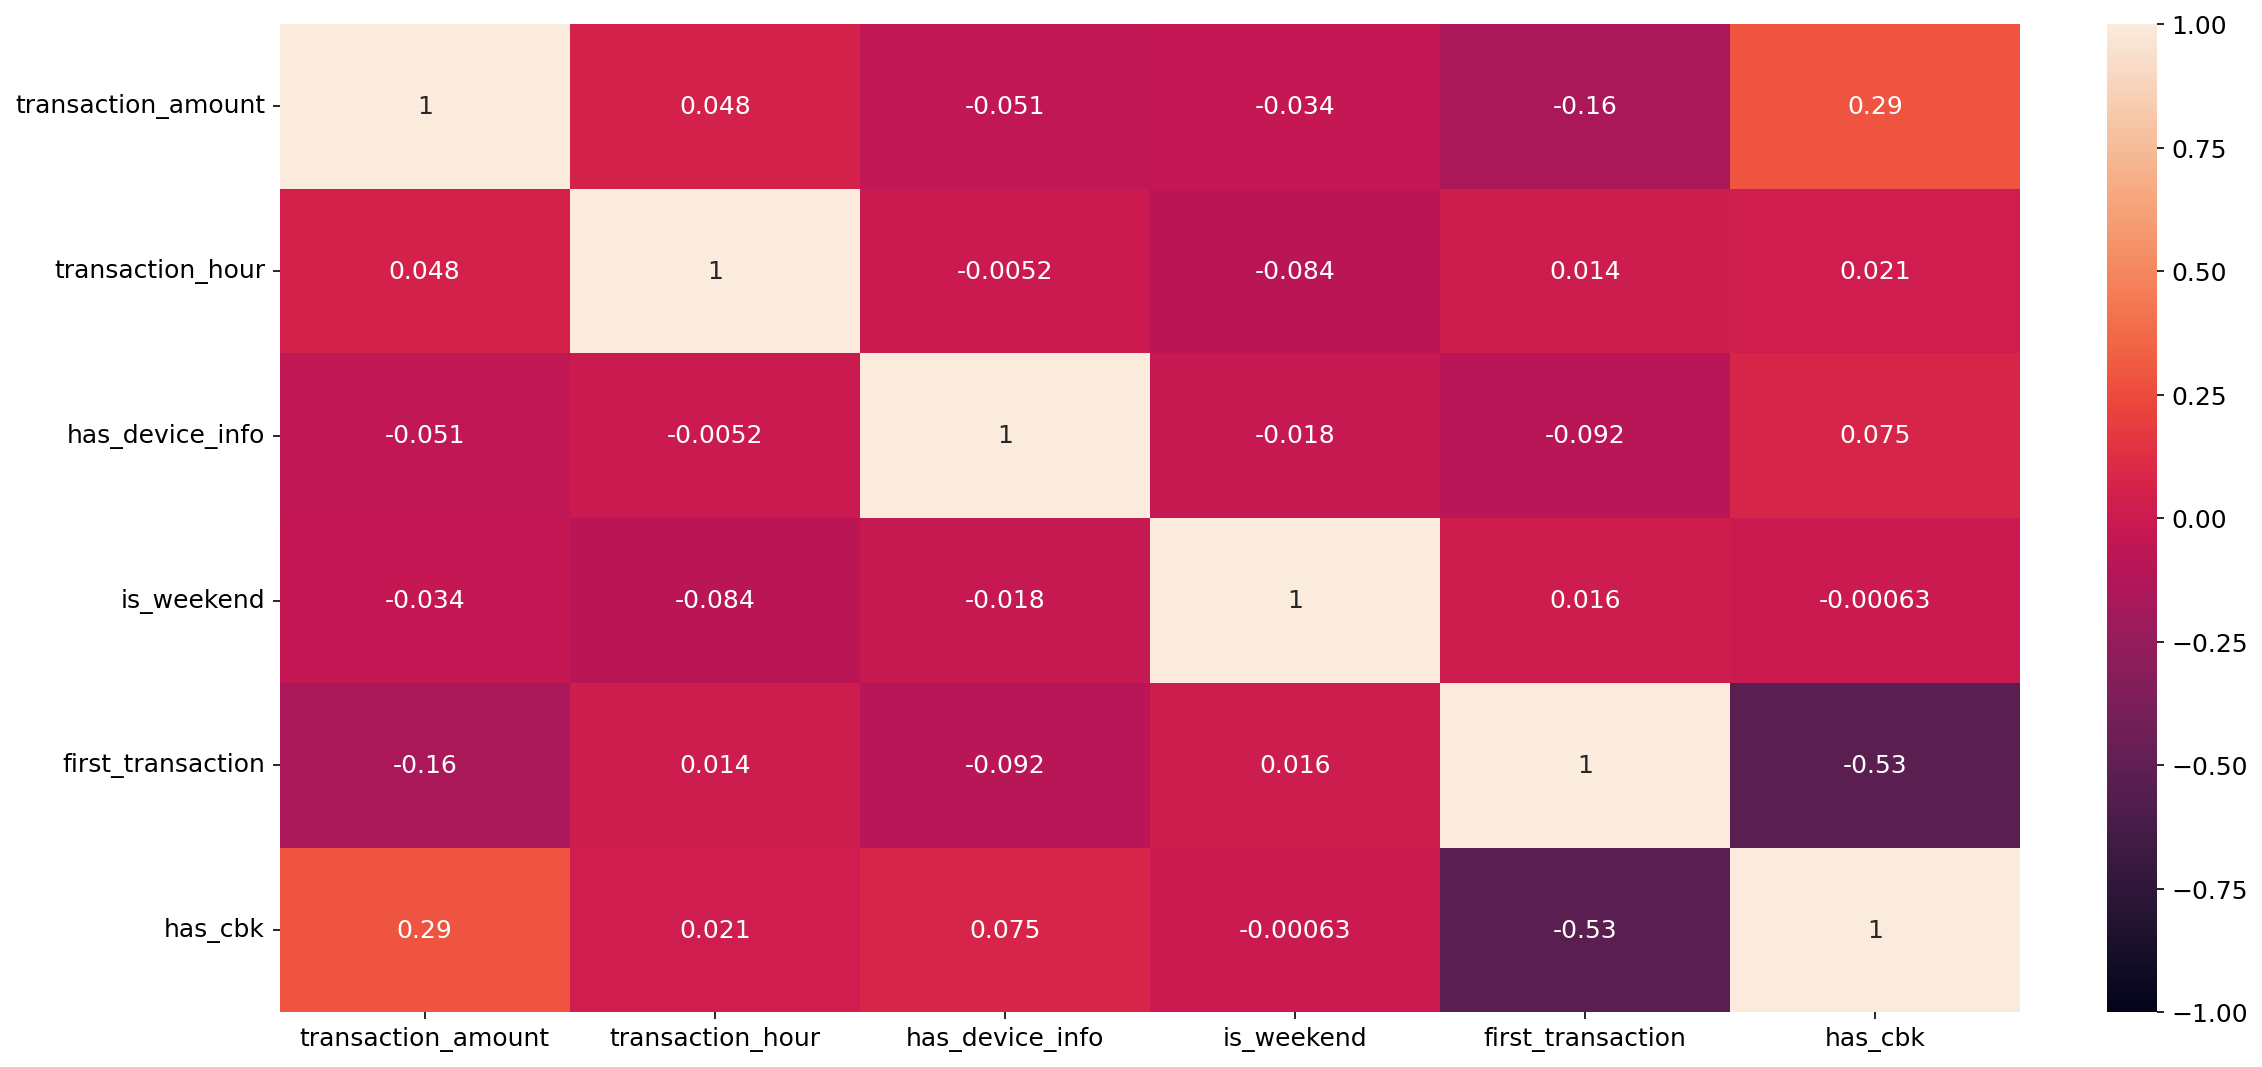

In [35]:
plt.figure(figsize=(15, 7))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
plt.show()

---

💡 **Insights:**

- A variável `transaction_amount` apresenta a correlação positiva mais forte com o alvo (0.29), confirmando que valores altos aumentam o risco de fraude.
- Já `first_transaction` tem correlação negativa expressiva (-0.53), indicando que usuários recorrentes (0) estão mais associados a fraudes do que primeiras transações (1).
- As demais variáveis mostram correlação fraca (<0.1), evidenciando baixa multicolinearidade entre as features.

---

### **3.5.3 Insights consolidados e Implicações para Feature Engineering**

A análise de valores, padrões temporais e comportamento do usuário revelou seis fatores determinantes associados ao aumento do risco de fraude.

#### 💡 **INSIGHT 1: Valores Extremos Concentram Fraudes**

**Evidência:**

* Transações >R$ 3000 têm Risco Relativo = 3x.
* Média de fraude por faixa de valor cresce progressivamente:
  * `R$ 0–500` → 3.9%
  * `R$ 500–1000` → 19.8%
  * `R$ 2500–3000` → 37.5%
  * `R$ 3500–4000` → 55.6%.
* Fraudadores têm valor médio de transação 2,1x maior que usuários legítimos.

**Interpretação:**\
Fraudadores maximizam lucro executando transações de alto valor.
Além disso, “valor alto” é relativo, para alguns usuários, uma compra de R$ 800 pode já ser fora do padrão individual.

**Implicação:**\
Para uma análise mais assertiva, vamos criar variáveis de valor relativo (comparado ao histórico do cliente).
Essas variáveis capturam desvios financeiros individuais e fortalecem a explicação do modelo.

**Features Derivadas (Seção 4):**

`value_exc_max` = Verifica se a transação é maior que qualquer compra anterior do cliente.\
`anomalous_value` = Verifica se a transação tem valor muito acima do normal para esse cliente.

---

#### 💡 **INSIGHT 2: Transações recorrentes e em Sequência têm Risco Elevado**

**Evidência:**

* Transações recorrentes quando comparadas a primeira transação tem ~11x mais risco.
* Transações com intervalo ≤1h têm Taxa de Fraude = 63.1% (RR = 5.16x).
* Quando o intervalo é >1h, o risco cai para 43.7% (RR = 3.58x), porém continua alto (devido ao viés temporal do dataset).

**Interpretação:**\
Fraudadores frequentemente fazem transações em sequência rápida (“burst transactions”) testando cartões roubados ou limites de valor antes do bloqueio.

**Implicação:**\
A quantidade de transações e o tempo entre elas é um forte sinal de comportamento anômalo.

**Feature Derivada (Seção 4):**

`burst_transaction` = Verifica a quantidade de transações realizadas dentro de uma janela de tempo pré-definida (1h).

---

#### 💡 **INSIGHT 3: Atividade Noturna Apresenta Maior Risco**

**Evidência:**

* Transações noturnas (Evening e Night) têm Taxa de Fraude entre 15.2% e 17.5% (1.25–1.44x acima do normal).
* A faixa de horário com taxas de fraude consistentemente acima da média situa-se entre 19h e 3h.

**Interpretação:**\
Fraudadores operam em horários de baixa vigilância, quando as vítimas estão offline ou o suporte bancário é reduzido.

**Implicação:**\
Hora do dia é um padrão temporal forte e fácil de capturar.

**Feature Derivada (Seção 4):**

`nighttime_flag` = Verifica se a transação foi realizada entre 19h e 3h.

---

#### 💡 **INSIGHT 4: Múltiplos Cartões elevam o Risco**

**Evidência:**

* A taxa média de fraude aumenta significativamente conforme o número de cartões cresce, sendo 29.1% para dois cartões e 57.1% para três ou mais.
* Já aqueles com apenas 1 cartão registram 3.7% de fraude.
* O risco cresce quase exponencialmente a cada novo cartão vinculado.

**Interpretação:**\
Fraudadores podem registrar múltiplos cartões roubados em um mesmo perfil ou tentar várias tentativas com cartões diferentes para contornar bloqueios.

**Implicação:**\
Variável útil para detectar comportamento de experimentação de cartões.

**Feature Derivada (Seção 4):**

`multi_card_flag` = Verifica se o usuário utilizou 2 cartões ou mais para realizar transações.

---

#### 💡 **INSIGHT 5: Múltiplos Dispositivos elevam o Risco**

**Evidência:**

* Usuários com ≥2 dispositivos apresentam taxa média de fraude = 37.4%.
* Já aqueles com apenas 1 dispositivo registram 4.8% de fraude.

**Interpretação:**\
Fraudadores costumam testar cartões roubados ou credenciais comprometidas em múltiplos dispositivos antes de transacionar valores altos. Usuários legítimos, por outro lado, tendem a usar apenas 1 dispositivo (próprio celular).

**Implicação:**\
Ajuda a identificar comportamento sistemático de testes ou ataques coordenados.

**Feature Derivada (Seção 4):**

`multi_device_flag` = Verifica se o usuário utilizou 2 dispositivos ou mais para realizar transações.

---

#### 💡 **INSIGHT 6: Perfil de Fraude Envolve Menor Base e Maior Intensidade**

**Evidência:**

* Apenas 6% dos usuários (153 pessoas) cometem todas as fraudes do dataset.
* Fraudadores realizam em média 3x mais transações e movimentam valores 2,4x maiores que usuários legítimos.

**Interpretação:**\
A fraude é concentrada em poucos usuários com comportamento extremo, o que sugere grupos ou contas automatizadas.

**Implicação:**\
Reforça a necessidade de features agregadas por usuário (média, desvio, total, etc.), permitindo que o modelo detecte padrões de comportamento repetitivo.

**Feature Derivada (Seção 4):**

`user_fraud_intensity` = Verifica a taxa média de fraude do usuário.\
`user_fraud_above_50` = Verifica se a taxa média de fraude daquele usuário é acima de 50%.

---

## 3.6 Conclusões da Análise Exploratória

A análise exploratória revelou padrões consistentes que diferenciam fortemente o comportamento de usuários legítimos e fraudulentos.
Os principais fatores de risco identificados estão relacionados a valores de transação elevados, atividade concentrada em janelas curtas de tempo, uso de múltiplos dispositivos e cartões, e realização de transações em horários noturnos.

Esses achados orientam diretamente o processo de engenharia de features, no qual os padrões observados são traduzidos em variáveis quantitativas capazes de capturar o comportamento de fraude de forma explícita e mensurável.
O objetivo agora é construir um conjunto de features robusto e interpretável, que preserve o raciocínio exploratório e potencialize o desempenho dos modelos supervisionados nas etapas seguintes.